CO2 Dataset Columns: Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions (per capita)'], dtype='object')
GDP Dataset Columns: Index(['Entity', 'Code', 'Year', 'GDP per capita', '900793-annotations'], dtype='object')
        Entity  Year  CO2 per Capita  Population  GDP per capita
1  Afghanistan  1950        0.011266   7480464.0          1156.0
2  Afghanistan  1951        0.012098   7571542.0          1170.0
3  Afghanistan  1952        0.011946   7667534.0          1189.0
4  Afghanistan  1953        0.013685   7764549.0          1240.0
5  Afghanistan  1954        0.013511   7864289.0          1245.0
               Year  CO2 per Capita    Population  GDP per capita
count  14740.000000    14740.000000  1.474000e+04    14740.000000
mean    1967.352917        3.721378  3.730727e+07     8894.721760
std       43.910310        6.986622  2.346158e+08    12139.249247
min     1750.000000        0.000000  2.431000e+04      377.580080
25%     1951.000000        0.270335  2.966147e+06     1930.00

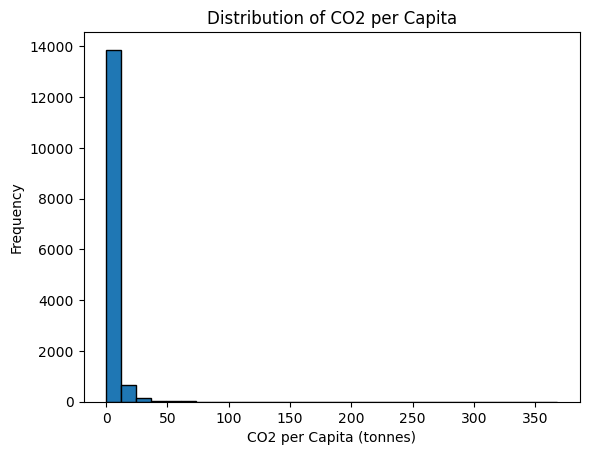

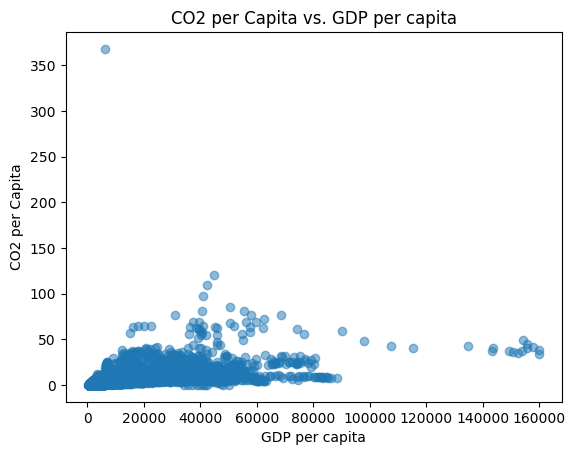

Correlation between CO2 per Capita and GDP per Capita: 0.6016967177698472
                            OLS Regression Results                            
Dep. Variable:         CO2 per Capita   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     4182.
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:43:17   Log-Likelihood:                -46257.
No. Observations:               14740   AIC:                         9.252e+04
Df Residuals:                   14737   BIC:                         9.254e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

# Load the datasets
df_co2 = pd.read_csv("co-emissions-per-capita.csv")
df_gdp = pd.read_csv("gdp-per-capita.csv")

# Strip any whitespace from the column names
df_co2.columns = df_co2.columns.str.strip()
df_gdp.columns = df_gdp.columns.str.strip()

# Display the column names to verify
print("CO2 Dataset Columns:", df_co2.columns)
print("GDP Dataset Columns:", df_gdp.columns)

# Rename relevant columns for clarity
df_co2.rename(columns={'Annual CO₂ emissions (per capita)': 'CO2 per Capita'}, inplace=True)
df_gdp.rename(columns={'GDP per capita, PPP (constant 2017 international $)': 'GDP per capita'}, inplace=True)

# Drop unnecessary columns
df_co2.drop(['Code'], axis=1, inplace=True)
df_gdp.drop(['Code', '900793-annotations'], axis=1, inplace=True)

# Merge dataframes based on 'Entity' and 'Year'
merged_df = pd.merge(df_co2, df_population, how='outer', on=['Entity', 'Year'])
merged_df = pd.merge(merged_df, df_gdp, how='outer', on=['Entity', 'Year'])

# Drop rows with missing values
merged_df.dropna(inplace=True)

# Display the first few rows of the merged dataframe
print(merged_df.head())
# Summary statistics
print(merged_df.describe())

# Visualize the distribution of CO2 per Capita
plt.hist(merged_df['CO2 per Capita'], bins=30, edgecolor='black')
plt.xlabel('CO2 per Capita (tonnes)')
plt.ylabel('Frequency')
plt.title('Distribution of CO2 per Capita')
plt.show()

# Scatter plot of CO2 per Capita vs. GDP per Capita
plt.scatter(merged_df['GDP per capita'], merged_df['CO2 per Capita'], alpha=0.5)
plt.xlabel('GDP per capita')
plt.ylabel('CO2 per Capita')
plt.title('CO2 per Capita vs. GDP per capita')
plt.show()

# Calculate correlation between CO2 per Capita and GDP per Capita
corr_gdp, _ = pearsonr(merged_df['GDP per capita'], merged_df['CO2 per Capita'])
print(f'Correlation between CO2 per Capita and GDP per Capita: {corr_gdp}')

# Define the dependent variable (response)
y = merged_df['CO2 per Capita']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

CO2 Dataset Columns: Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions (per capita)'], dtype='object')
Population Dataset Columns: Index(['Entity', 'Code', 'Year', 'Population'], dtype='object')

Top 10 countries with the largest decrease in CO2 per capita:
                               Entity  CO2 per Capita Change
51                           Curacao          -4.407578e+06
182        Sint Maarten (Dutch part)          -4.826300e+04
148                             Niue           3.896000e+03
221                Wallis and Futuna           8.141002e+03
209                           Tuvalu           1.134000e+04
169                     Saint Helena           1.415200e+04
131             Micronesia (country)           1.563799e+04
135                       Montserrat           1.771600e+04
140                            Nauru           2.361000e+04
26   Bonaire Sint Eustatius and Saba           2.784000e+04


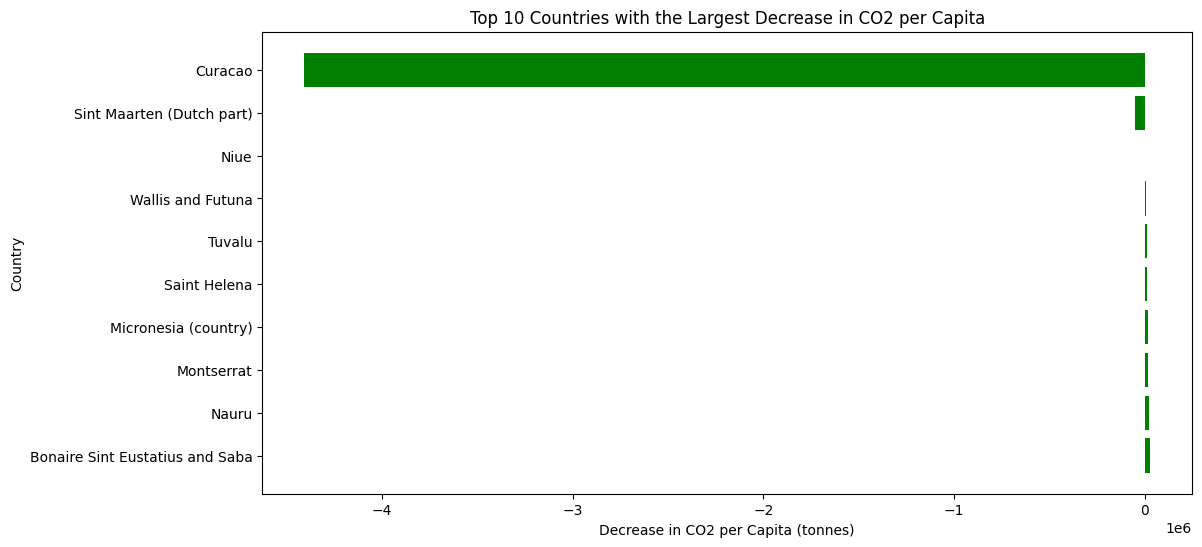

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
df_co2 = pd.read_csv("co-emissions-per-capita.csv")
df_population = pd.read_csv("population-regions.csv")

# Strip any whitespace from the column names
df_co2.columns = df_co2.columns.str.strip()
df_population.columns = df_population.columns.str.strip()

# Display the column names to verify
print("CO2 Dataset Columns:", df_co2.columns)
print("Population Dataset Columns:", df_population.columns)

# Rename relevant columns for clarity
df_co2.rename(columns={'Annual CO₂ emissions (per capita)': 'CO2 per Capita'}, inplace=True)
df_population.rename(columns={'Population': 'Population'}, inplace=True)

# Drop unnecessary columns
df_co2.drop(['Code'], axis=1, inplace=True)
df_population.drop(['Code'], axis=1, inplace=True)

# Merge dataframes based on 'Entity' and 'Year'
merged_df = pd.merge(df_co2, df_population, how='outer', on=['Entity', 'Year'])

# Drop rows with missing values
merged_df.dropna(inplace=True)

# Calculate CO2 per capita
merged_df['Total CO2'] = merged_df['CO2 per Capita'] * merged_df['Population']

# Calculate the change in CO2 per capita over time
merged_df = merged_df.sort_values(by=['Entity', 'Year'])
merged_df['CO2 per Capita Change'] = merged_df.groupby('Entity')['Total CO2'].diff()

# Group by 'Entity' and calculate the total change in CO2 per capita
df_co2_change = merged_df.groupby('Entity').agg({'CO2 per Capita Change': 'sum'}).reset_index()

# Sort by the largest decrease
df_co2_change = df_co2_change.sort_values(by='CO2 per Capita Change', ascending=True)

# Get the top 10 countries with the largest decrease
top_decreasing_countries = df_co2_change.head(10)

print("\nTop 10 countries with the largest decrease in CO2 per capita:\n", top_decreasing_countries)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.barh(top_decreasing_countries['Entity'], top_decreasing_countries['CO2 per Capita Change'], color='green')
plt.xlabel('Decrease in CO2 per Capita (tonnes)')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Largest Decrease in CO2 per Capita')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest decrease at the top
plt.show()

Columns in the levelized cost of energy dataset: Index(['Entity', 'Code', 'Year', 'Bioenergy levelized cost of energy',
       'Geothermal levelized cost of energy',
       'Offshore wind levelized cost of energy',
       'Solar photovoltaic levelized cost of energy',
       'Concentrated solar power levelized cost of energy',
       'Hydropower levelized cost of energy',
       'Onshore wind levelized cost of energy'],
      dtype='object')
      Entity Code  Year  Bioenergy levelized cost of energy  \
0  Argentina  ARG  2012                                 NaN   
1  Argentina  ARG  2013                                 NaN   
2  Argentina  ARG  2014                                 NaN   
3  Argentina  ARG  2015                                 NaN   
4  Argentina  ARG  2017                                 NaN   

   Geothermal levelized cost of energy  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3      

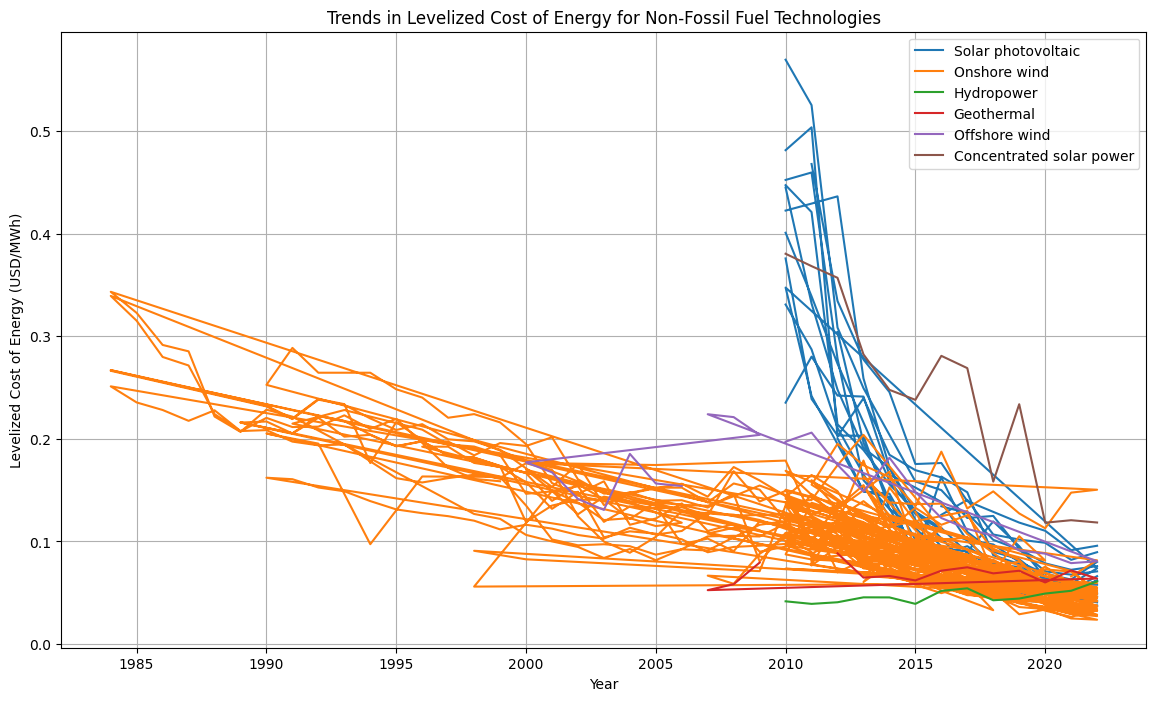

Entity              Brazil
Year                  2022
Technology    Onshore wind
Cost               0.02367
Name: 3597, dtype: object

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_cost = pd.read_csv("levelized-cost-of-energy.csv")

# Inspect the dataset
print("Columns in the levelized cost of energy dataset:", df_cost.columns)
print(df_cost.head())

# Reshape the dataframe to have 'Entity', 'Year', 'Technology', 'Cost'
df_melted = df_cost.melt(id_vars=['Entity', 'Year'], 
                         value_vars=[
                             'Geothermal levelized cost of energy',
                             'Offshore wind levelized cost of energy',
                             'Solar photovoltaic levelized cost of energy',
                             'Concentrated solar power levelized cost of energy',
                             'Hydropower levelized cost of energy',
                             'Onshore wind levelized cost of energy'],
                         var_name='Technology', value_name='Cost')

# Simplify technology names
df_melted['Technology'] = df_melted['Technology'].str.replace(' levelized cost of energy', '')

# Filter for non-fossil fuel energy technologies
non_fossil_fuel_tech = ['Solar photovoltaic', 'Onshore wind', 'Hydropower', 'Geothermal', 'Offshore wind', 'Concentrated solar power']

# Ensure the dataset contains the technologies we're interested in
df_non_fossil = df_melted[df_melted['Technology'].isin(non_fossil_fuel_tech)]

# Plot the cost trends over time for each technology
plt.figure(figsize=(14, 8))
for tech in non_fossil_fuel_tech:
    tech_data = df_non_fossil[df_non_fossil['Technology'] == tech]
    plt.plot(tech_data['Year'], tech_data['Cost'], label=tech)

plt.xlabel('Year')
plt.ylabel('Levelized Cost of Energy (USD/MWh)')
plt.title('Trends in Levelized Cost of Energy for Non-Fossil Fuel Technologies')
plt.legend()
plt.grid(True)
plt.show()

# Identify the best (lowest) price technology in the future
# Assume "future" means the latest year in the dataset
latest_year = df_non_fossil['Year'].max()
future_costs = df_non_fossil[df_non_fossil['Year'] == latest_year]

# Find the technology with the lowest cost in the latest year
best_price_tech = future_costs.loc[future_costs['Cost'].idxmin()]

best_price_tech